### Pacotes:

In [ ]:
# Manipulação de dados:
import pandas as pd
import numpy as np

# Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelos de Classificação:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import xgboost as xgb

# Divisão de dados:
from sklearn.model_selection import (
    train_test_split, GridSearchCV, StratifiedKFold,
    RepeatedStratifiedKFold, cross_validate, learning_curve
)

# Métricas de Avaliação:
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,
    auc, roc_curve, log_loss, average_precision_score,
    matthews_corrcoef, cohen_kappa_score, brier_score_loss
)

# Pipeline e Seleção de Atributos:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, RFECV

# Importância de atributos:
from sklearn.inspection import permutation_importance

# Calibração:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Outros:
from IPython.display import display_html
import shap

### Base de Dados:

In [8]:
df = pd.read_csv('Dados\dados.csv').drop(columns=['Unnamed: 0'])
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,class
0,0.276295,1.294890,0.888687,1.763403,1.924051,-1.525458,0.736443,2.179009,-0.015214,-1.211330,...,0.753638,-0.461635,-0.436963,0.617467,2.182922,1.146251,-0.552142,-4.425882,0.116849,0
1,0.677212,0.185459,0.064948,0.073792,0.084700,0.282421,0.698945,-0.054451,-0.778294,1.831007,...,0.668149,0.784069,0.393311,-0.293001,-0.983352,-0.895915,-0.731225,-2.093978,1.235367,1
2,-1.044824,0.310883,0.227623,0.594970,1.384309,1.307542,0.788633,-3.694418,0.727152,0.931730,...,2.407056,0.834948,0.214112,0.840987,-0.143899,0.469351,0.124603,5.336205,1.715460,0
3,-0.913868,-0.670931,0.119123,-2.052029,-1.431409,1.500219,0.038840,-1.338867,-0.665248,-0.385238,...,1.397313,-0.626133,-0.587009,-1.512317,1.518929,-0.755945,-1.248030,-2.261296,0.338201,1
4,1.534146,1.599091,1.373254,0.225192,0.293527,-0.890291,-0.741208,-1.887151,1.226785,-0.216320,...,1.129395,-0.394848,-0.734817,1.450767,-0.526408,-0.381483,-0.921186,-0.371460,-0.843425,1


#### Exploração dos Dados:

Os dois códigos abaixo têm como finalidade auxiliar na verificação da integridade dos dados. O primeiro código analisa se há valores ausentes (nulos) na base e, caso existam, identifica quais colunas os contêm; se não houver, informa que não há valores nulos. Já o segundo código verifica a presença de linhas duplicadas, exibindo as duplicatas encontradas ou informando que não há registros repetidos. Essas etapas são essenciais para garantir a qualidade dos dados antes de prosseguir com análises e modelagens.

In [39]:
# 1ª verificação de valores nulos:

if df.isnull().values.any():
    print("Existem valores nulos nas seguintes colunas:")
    print(df.columns[df.isnull().any()].tolist())
else:
    print("Não existem valores nulos em nenhuma coluna.")

Não existem valores nulos em nenhuma coluna.


In [ ]:
#2ª verificação de duplicatas:

if df.duplicated().any():
    print("Existem duplicatas na base de dados:")
    print(df[df.duplicated()])
else:
    print("Não existem duplicatas na base de dados.")

Não existem duplicatas na base de dados.


O código abaixo irá primeiro calcula a matriz de correlação entre todas as colunas do DataFrame. Em seguida, ele cria uma máscara para selecionar apenas a parte inferior da matriz (excluindo a diagonal), evitando assim considerar pares repetidos. Usando essa máscara, o código desempacota a matriz filtrada em pares (coluna1, coluna2) com seus respectivos valores de correlação. Depois, ele ordena esses pares e seleciona os 10 com maior correlação negativa e os 10 com maior correlação positiva, imprimindo os resultados para análise.

In [8]:
corr = df.corr()

mask = np.tril(np.ones(corr.shape), k=-1).astype(bool)
corr_lower = corr.where(mask)

corr_pairs = corr_lower.unstack().dropna().sort_values()
top_negative = corr_pairs.head(10)
top_positive = corr_pairs.tail(10)

print("Pares com maior correlação negativa:")
for pair, value in top_negative.items():
    print(pair, ":", value)

print("\nPares com maior correlação positiva:")
for pair, value in top_positive.items():
    print(pair, ":", value)

Pares com maior correlação negativa:
('feat_11', 'feat_43') : -0.07201416605295116
('feat_3', 'feat_43') : -0.06642863257892848
('feat_18', 'feat_32') : -0.06072623988683856
('feat_7', 'feat_44') : -0.06012591926525411
('feat_6', 'feat_8') : -0.05560269069833383
('feat_25', 'feat_29') : -0.0555108555681052
('feat_13', 'feat_20') : -0.05233971566918373
('feat_28', 'feat_50') : -0.052035967708288534
('feat_11', 'feat_32') : -0.051202469749061744
('feat_10', 'feat_37') : -0.05023793080126465

Pares com maior correlação positiva:
('feat_46', 'feat_49') : 0.053384162197382415
('feat_30', 'feat_34') : 0.05513422815585819
('feat_2', 'feat_49') : 0.05513679887350359
('feat_17', 'feat_30') : 0.05563963679752099
('feat_19', 'feat_43') : 0.058681445398577746
('feat_38', 'feat_51') : 0.05910899629020718
('feat_18', 'feat_40') : 0.0593289467806393
('feat_8', 'feat_41') : 0.059434248216298884
('feat_12', 'feat_43') : 0.07512027767130894
('feat_31', 'class') : 1.0000000000000004


Observe que `feat_31` tem correlação de `100%` com a target. Logo, devemos retirar essa coluna da nossa base.

In [11]:
df.drop(columns=['feat_31'], inplace=True)

Observação da distribuição da variável class:

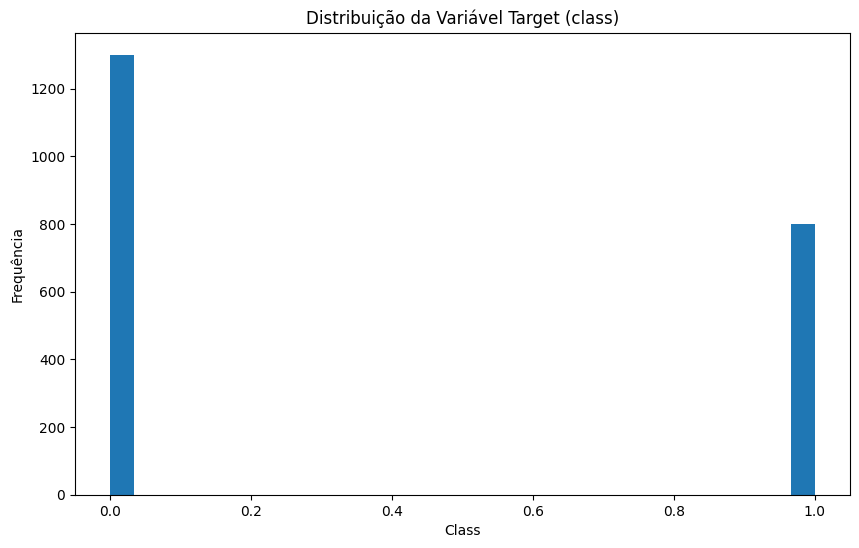

In [10]:
df['class'].plot(kind='hist', bins=30, figsize=(10, 6), title='Distribuição da Variável Target (class)')
plt.xlabel('Class')
plt.ylabel('Frequência')
plt.show()

No plot acima, observa-se que a distribuição dos rótulos das classes está relativamente balanceada, sem um desequilíbrio excessivo entre as classes 0 e 1. Essa distribuição de certa forma "equilibrada" sugere que o modelo não precisará lidar com problemas severos de viés decorrente da desproporção dos dados, o que pode favorecer tanto a fase de treinamento quanto a avaliação do desempenho do modelo.

### Modelagem e Validação:

##### Baseline Inicial:

Nesta sub-sessão, o objetivo é estabelecer um ponto de partida para o desempenho dos modelos. Serão treinados modelos simples (por exemplo, Regressão Logística e Random Forest) para avaliar as métricas básicas – como acurácia e precisão – tanto no conjunto de treinamento quanto no de validação. Essa etapa é fundamental para:

- Definir um benchmark para comparações futuras, servindo como referência para o desenvolvimento e ajuste de modelos mais complexos.
- Verificar se o fluxo de trabalho e a preparação dos dados estão corretos.
- Identificar possíveis problemas iniciais, como overfitting ou underfitting, que possam ser abordados nas etapas posteriores.

Separando os dados em treino, teste e validação, onde o Treino é 80%, Teste 10%, e Validação: 10%:

In [97]:
X, y = df.drop(columns=['class']), df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test,
                                                random_state = 42)

Obtendo a precisão e acuracia de modelos iniciais e avaliando as features mais importantes:

O primeiro modelo utilizado em um teste inicial é a `Regressão Logistica`

In [12]:
log_reg = LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='saga', random_state=42).fit(X_train, y_train)

print("Métricas do Random Forest para o conjunto de treinamento e validação:\n")
print("Treinamento - Acurácia: \033[93m{:.2f}%\033[0m".format(accuracy_score(y_train, log_reg.predict(X_train)) * 100))
print("Treinamento - Precisão: \033[93m{:.2f}%\033[0m".format(precision_score(y_train, log_reg.predict(X_train), average='weighted') * 100), "\n")

print("Validação - Acurácia: \033[92m{:.2f}%\033[0m".format(accuracy_score(y_val, log_reg.predict(X_val)) * 100))
print("Validação - Precisão: \033[92m{:.2f}%\033[0m".format(precision_score(y_val, log_reg.predict(X_val), average='weighted') * 100))

Métricas do Random Forest para o conjunto de treinamento e validação:

Treinamento - Acurácia: 62.14%
Treinamento - Precisão: 65.11% 

Validação - Acurácia: 62.38%
Validação - Precisão: 76.60%


A análise dos resultados iniciais revela que o modelo simples, utilizado como benchmark inicial, apresentou desempenho consistente entre os conjuntos de treinamento e validação, evidenciado por métricas similares de acurácia e precisão. Esse comportamento indica que não há sinais de overfitting nem underfitting, reforçando a confiabilidade do fluxo de trabalho e da preparação dos dados, mesmo utilizando todas as features. Porém há margem para melhorar o desempenho utilizando outros modelos mais robustos.

A configuração adotada para esse modelo inicial foi baseada em Regressão Logística com parâmetros ajustados -- `max_iter=1000`, `C=0.1`, `penalty l1`, `solver saga` e `random_state=42`.

O segundo modelo utilizado em um teste inicial é o `Random Forest`

In [13]:
rf = RandomForestClassifier(n_estimators = 200, random_state = 42, class_weight = 'balanced').fit(X_train, y_train)

print("Métricas do Random Forest para o conjunto de treinamento e validação:\n")
print("Treinamento - Acurácia: \033[93m{:.2f}%\033[0m".format(accuracy_score(y_train, rf.predict(X_train)) * 100))
print("Treinamento - Precisão: \033[93m{:.2f}%\033[0m".format(precision_score(y_train, rf.predict(X_train), average='weighted') * 100), "\n")

print("Validação - Acurácia: \033[92m{:.2f}%\033[0m".format(accuracy_score(y_val, rf.predict(X_val)) * 100))
print("Validação - Precisão: \033[92m{:.2f}%\033[0m".format(precision_score(y_val, rf.predict(X_val), average='weighted') * 100))

Métricas do Random Forest para o conjunto de treinamento e validação:

Treinamento - Acurácia: 100.00%
Treinamento - Precisão: 100.00% 

Validação - Acurácia: 76.67%
Validação - Precisão: 76.75%


Os resultados iniciais do RandomForestClassifier mostram que, embora o modelo tenha atingido 100% de desempenho no treinamento, as métricas na validação ficaram em torno de 76%. Essa discrepância indica uma queda considerável na performance fora do conjunto de treino, sugerindo a presença de overfitting e a necessidade de ajustes para melhorar a generalização. Para isso, vamos explorar a diminuição de dimensionalidade e a remoção de colunas irrelevantes, para assim, verificar se conseguimos melhorar o desempenho do modelo e assim, evitar o overfitting. Além disso, vamos analisar a importância das features para identificar quais delas são mais relevantes para o modelo, o que pode ajudar na seleção de variáveis e na melhoria do desempenho geral.


Obtendo o top 20 features mais importantes via árvore:

In [14]:
importances = pd.Series(rf.feature_importances_, index = X_train.columns)
tree_features = importances.sort_values(ascending = False).head(20).index

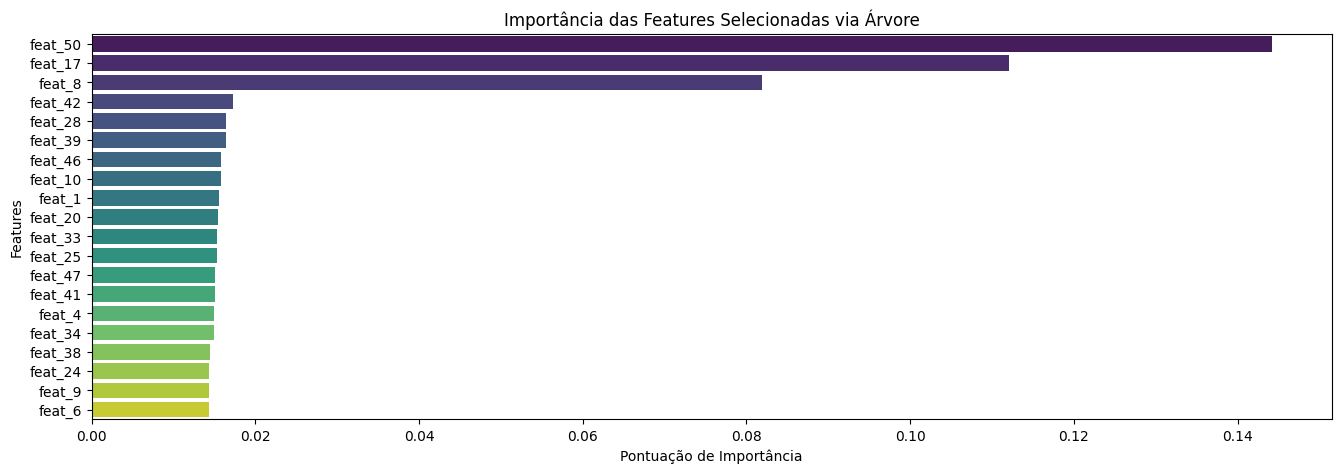

In [15]:
plt.figure(figsize=(16, 5))
sns.barplot(x=importances[tree_features],
            y=tree_features,
            hue=tree_features,
            dodge=False,
            palette='viridis')
plt.title('Importância das Features Selecionadas via Árvore')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Features')
plt.show()

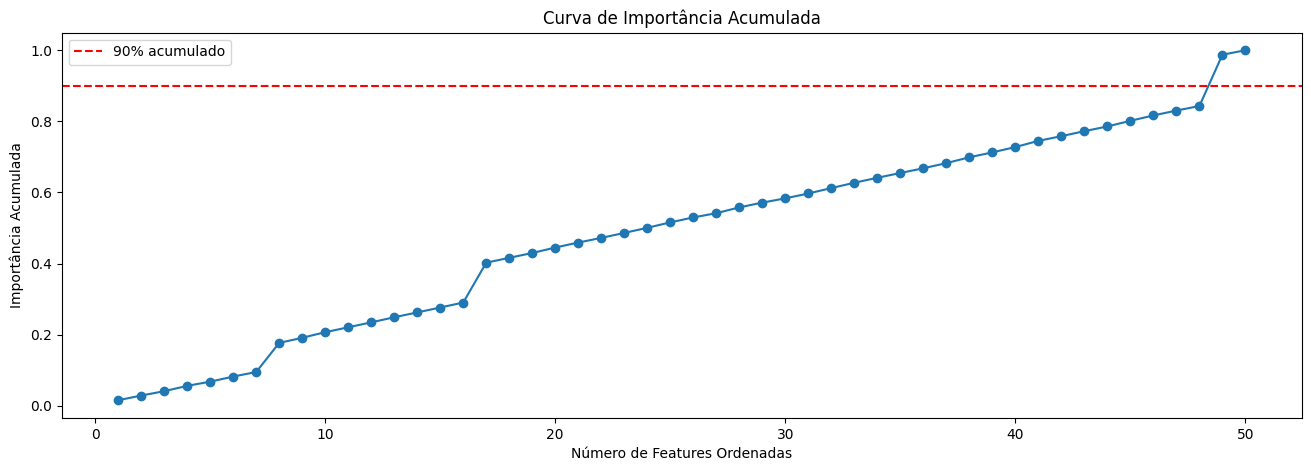

In [16]:
cum_importance = importances.cumsum()
plt.figure(figsize=(16, 5))
plt.plot(np.arange(1, len(cum_importance)+1), cum_importance, marker='o')
plt.axhline(0.90, color='red', linestyle='--', label='90% acumulado')
plt.xlabel('Número de Features Ordenadas')
plt.ylabel('Importância Acumulada')
plt.title('Curva de Importância Acumulada')
plt.legend()
plt.show()

Observa-se que apenas três features (feat_8, feat_17 e feat_50) apresentam uma importância alta para o modelo, enquanto as demais variáveis possuem uma importância moderada e bem similar entre si. Essa constatação é reforçada pela análise da curva de importância acumulada, que demonstra que, embora a soma das importâncias vá aumentando com a inclusão de mais features, o incremento percentual se estabiliza após as três principais, evidenciando que a adição das demais não traz ganhos expressivos em termos de informação preditiva.

O que nós leva a entender que essas são as 3 features que podemos seguir com a modelagem:

In [17]:
top_features = importances.sort_values(ascending=False).head(3).index
print(f"Features com maior importância: \033[93m{list(top_features)}\033[0m")

Features com maior importância: ['feat_50', 'feat_17', 'feat_8']


Porém, vamos validar se nenhuma outra feature importante não ficou de fora, e para isso, vamos usar outros metodos para entender quais outras features importântes:

A função `permutation_importance` avalia a importância de cada feature mensurando a variação na performance do modelo quando os valores de uma determinada feature são embaralhados. Em essência, ela compara a métrica (por exemplo, acurácia ou ROC-AUC) do modelo antes e depois da permutação, evidenciando quanto cada variável contribui para as predições.

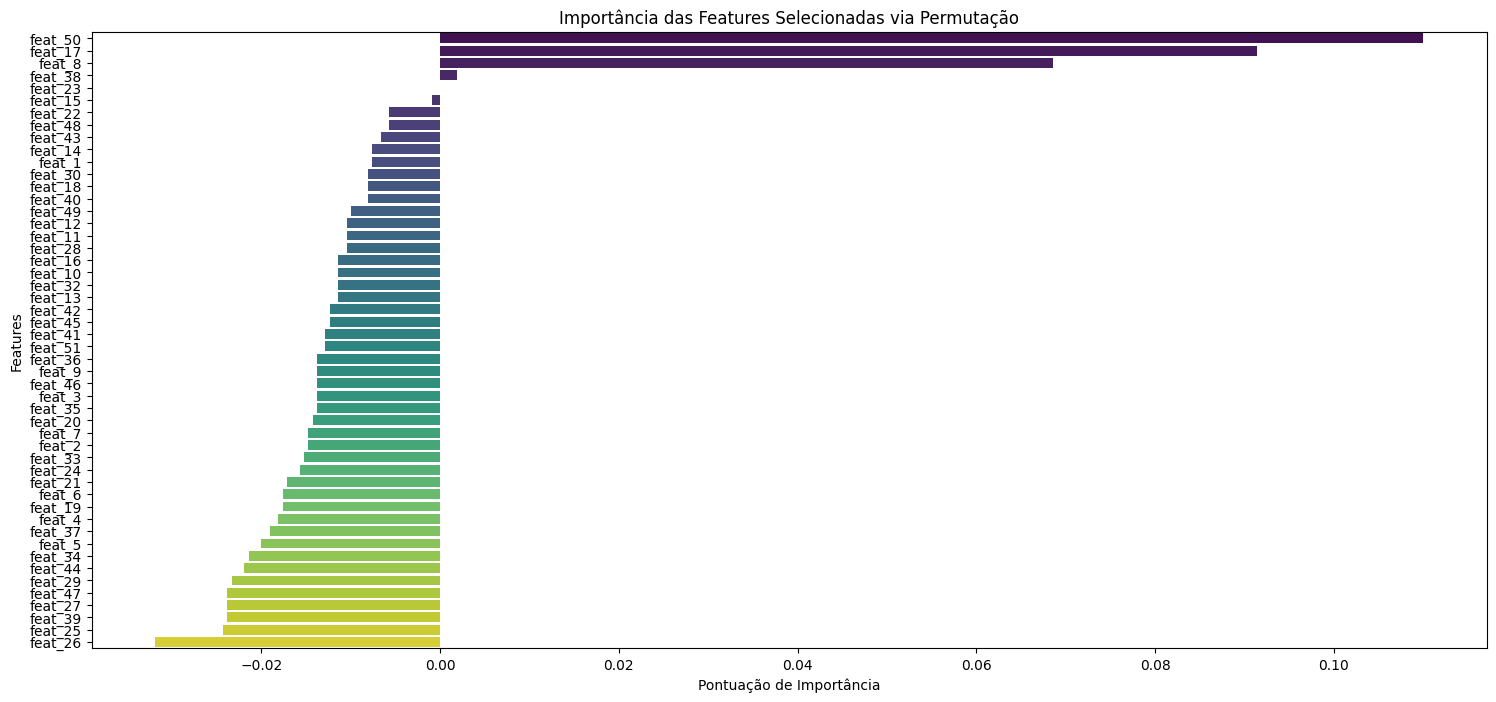

In [18]:
perm = permutation_importance(
    rf, X_test, y_test,
    n_repeats=10,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)
perm_importances = pd.Series(perm.importances_mean, index=X_test.columns)
perm_importances_features = perm_importances.sort_values(ascending = False).index

plt.figure(figsize=(18, 8))
sns.barplot(x=perm_importances[perm_importances_features],
            y=perm_importances_features,
            hue=perm_importances_features,
            dodge=False,
            palette='viridis')
plt.title('Importância das Features Selecionadas via Permutação')
plt.xlabel('Pontuação de Importância')
plt.ylabel('Features')
plt.show()

Utilizando o `RFECV`, o algoritmo realizará uma eliminação recursiva das features, ou seja, ele descarta iterativamente os atributos menos relevantes para o modelo. Ao mesmo tempo, emprega validação cruzada para avaliar o desempenho do modelo a cada etapa, determinando o número ótimo de variáveis que mantém ou melhora a precisão do classificador. Dessa forma, o RFECV contribui para reduzir a dimensionalidade dos dados, melhora a interpretabilidade do modelo e pode ajudar a prevenir problemas como o overfitting.

Número ótimo de features RFECV: 3


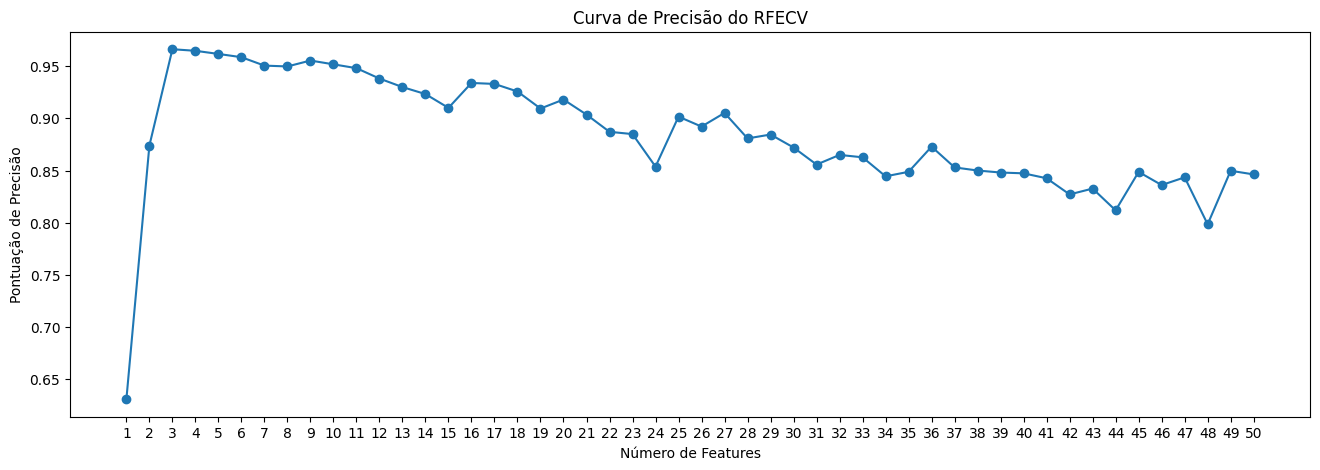

In [ ]:
rfecv = RFECV(
    estimator=rf,
    step=1,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='precision',
    n_jobs=-1
).fit(X_train, y_train)

print("Número ótimo de features RFECV:", rfecv.n_features_)

plt.figure(figsize=(16, 5))
x_vals = range(1, len(rfecv.cv_results_['mean_test_score'])+1)
plt.plot(x_vals, rfecv.cv_results_['mean_test_score'], marker='o')
plt.xticks(x_vals)
plt.xlabel('Número de Features')
plt.ylabel('Pontuação de Precisão')
plt.title('Curva de Precisão do RFECV')
plt.show()

No gráfico de importância por permutação, podemos observar que ao embaralhar os valores de cada feature individualmente, apenas aquelas que possuem forte impacto na predição — notadamente feat_8, feat_17 e feat_50 — causam uma queda significativa no desempenho do modelo. Isso confirma que essas variáveis são cruciais, enquanto as demais apresentam contribuição marginal para a capacidade preditiva.

Por outro lado, o plot do RFECV demonstra a evolução da métrica de precisão à medida que diferentes quantidades de features são incluídas. Nota-se que a performance atinge um platô com apenas um pequeno subconjunto de variáveis, validando que a inclusão de features adicionais não traz ganhos expressivos. Esse comportamento ajuda a definir o número ótimo de features, permitindo reduzir a dimensionalidade do modelo sem prejuízo ao desempenho e ainda contribuindo para diminuir o risco de overfitting.


O módulo `SHAP` (SHapley Additive exPlanations) é utilizado para interpretar a contribuição de cada feature nas predições do modelo. No código a seguir, o `SHAP` vai calcular os valores de `Shapley` para cada instância do conjunto de treinamento usando um `TreeExplainer` aplicado ao modelo de `Random Forest`. Em seguida, ele gera um gráfico de resumo (`summary_plot`) em formato violin plot, que mostra a distribuição dos impactos (valores absolutos dos `SHAP`) de cada feature na previsão, facilitando a identificação das variáveis mais influentes.

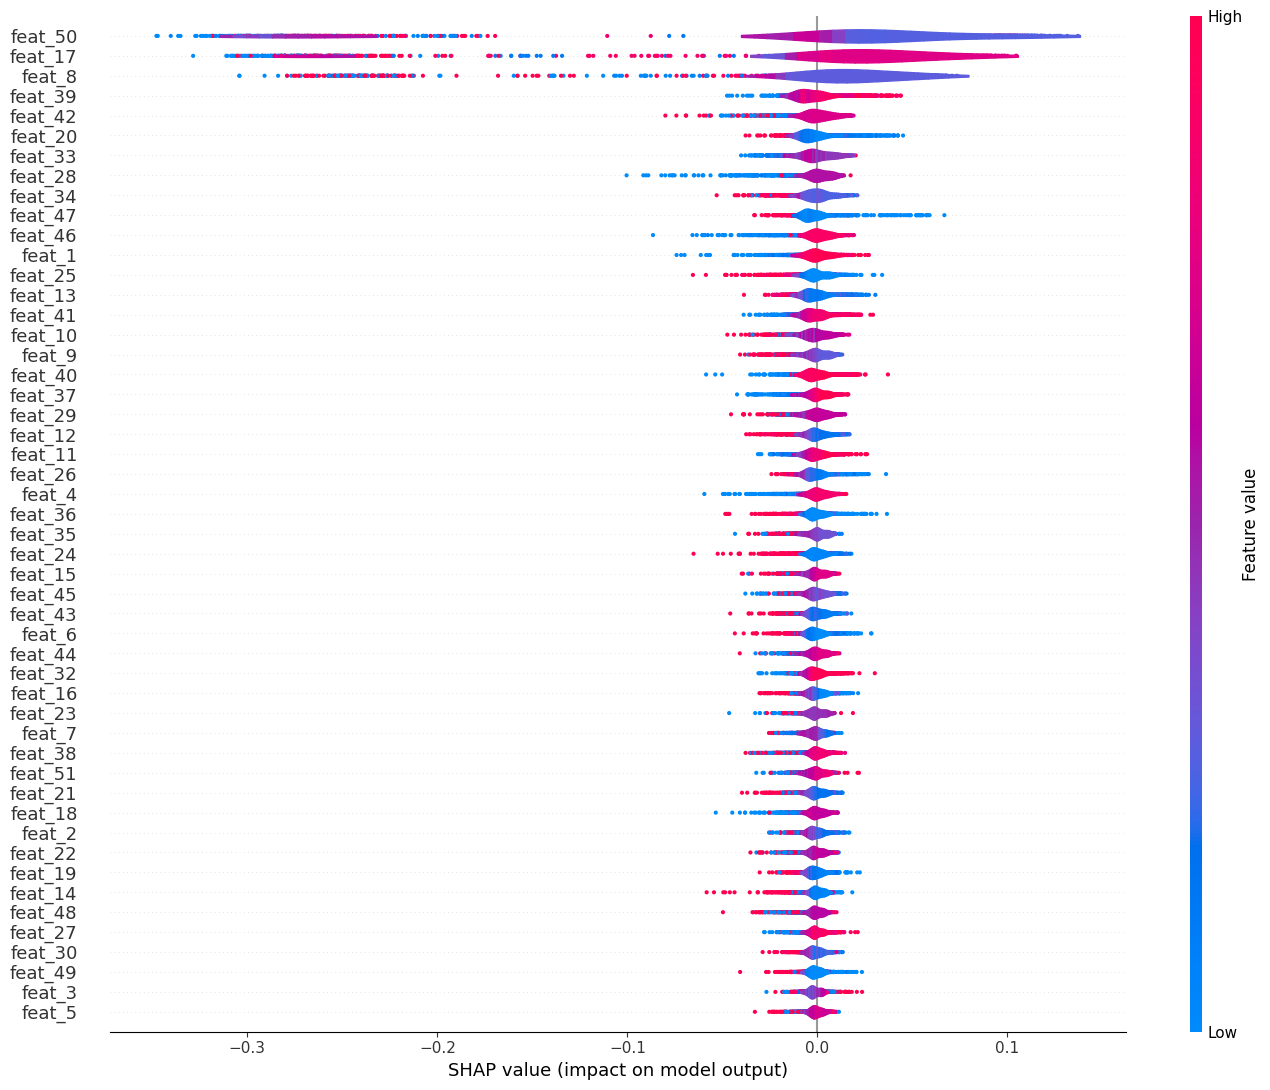

In [ ]:
# SHAP para interpretação local/global:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Importâncias globais via mean(|SHAP|):
shap.summary_plot(shap_values[:, :, 1], X_train, plot_type="violin", plot_size=(14, 11), max_display=51)

Após a análise no plot do SHAP, confirma-se que as features feat_8, feat_17 e feat_50 são as que apresentam maiores impactos nas predições do modelo. Os valores absolutos dos SHAP indicam que essas variáveis contribuem significativamente para a decisão do classificador, corroborando os resultados obtidos anteriormente com a árvore de decisão e os métodos de importância por permutação. Dessa forma, a interpretação da contribuição de cada feature, evidenciada pelo summary plot, reforça que a seleção dessas três variáveis é fundamentada e robusta, validando sua relevância para a modelagem.

Separando as features selecionadas:

In [29]:
selected = top_features

print("Features selecionadas:")
for feature in selected:
        print(feature)

print("\nNúmero de features selecionadas:", len(selected))

Features selecionadas:
feat_50
feat_17
feat_8

Número de features selecionadas: 3


Nesta subsucessão, avaliamos dois modelos iniciais – Regressão Logística e Random Forest – para obter um benchmark preliminar e validar o fluxo de trabalho. A Regressão Logística, com regularização L1 e parâmetros ajustados, demonstrou desempenho consistente, enquanto o Random Forest apresentou alta acurácia no treinamento, mas evidenciou sinais de overfitting quando comparado à validação. Essa discrepância serviu como alerta para a necessidade de reduzir a dimensionalidade e mitigar o overfitting.

A seleção das features revelou que, apesar de várias variáveis estarem presentes, apenas três `(feat_8, feat_17 e feat_50)` possuem impacto significativo nas predições – evidenciado tanto pela análise da importância via árvore quanto pelos métodos de permutação e RFECV. Essa constatação reforça que o modelo pode se beneficiar de uma redução de dimensionalidade, focando apenas nas features mais relevantes, o que melhora a interpretabilidade e a robustez da generalização.

Em resumo, o procedimento inicial mostrou que a combinação de avaliações dos modelos e a análise das features mais importantes permitiu identificar as variáveis críticas para a tomada de decisão. Essa compreensão é fundamental para orientar os ajustes futuros, equilibrando o desempenho e a capacidade de generalização do modelo final.

#### Comparação de Modelos:

Nesta sessão, iremos comparar o desempenho de diferentes modelos classificadores utilizando apenas as features selecionadas `(feat_8, feat_17 e feat_50)`. A ideia é treinar cada modelo com esses atributos e avaliar suas métricas, como acurácia, precisão, recall, F1-Score e ROC-AUC, nos conjuntos de treinamento, validação e teste. Dessa forma, poderemos identificar qual modelo apresenta o melhor equilíbrio entre capacidade preditiva e generalização. Além disso, o uso de validação cruzada e análise dos resultados permite entender a robustez dos modelos ao longo de múltiplas partições dos dados, garantindo que a escolha do modelo final seja sólida e replicável.

Separando novamente os dados em treino, teste e validação, mas com as features mais importantes.

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X[list(selected)], y, test_size=0.2, stratify=y,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, stratify= y_test,
                                                random_state = 42)

**Modelos Selecionados:**

- **Regressão Logística:**  
    Utiliza `LogisticRegression` com os parâmetros:
    - max_iter=1000  
    - C=0.1  
    - penalty='l1'  
    - solver='saga'  
    - random_state=42

- **Foresta Aleatória:**  
    Utiliza `RandomForestClassifier` com os parâmetros:
    - n_estimators=200  
    - class_weight='balanced'  
    - random_state=42

- **Árvore de Decisão:**  
    Utiliza `DecisionTreeClassifier` com os parâmetros:
    - class_weight='balanced'  
    - random_state=42

- **K-Nearest Neighborss:**  
    Utiliza `KNeighborsClassifier` com os parâmetros padrão

- **Extremo Gradient Boosting:**  
    Utiliza `xgb.XGBClassifier` com o parâmetro:
    - random_state=42

- **SVM:**  
    Utiliza `svm.SVC` com os parâmetros:
    - class_weight='balanced'  
    - probability=True  
    - random_state=42

In [32]:
names = [
    "Regressão Logística",
    "Foresta Aleatória",
    "Árvore de Decisão",
    "K-Nearest Neighborss",
    "Extremo Gradient Boosting",
    "SVM"
]

models = [
    LogisticRegression(max_iter=1000, C=0.1, penalty='l1', solver='saga', random_state=42),
    RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
    DecisionTreeClassifier(class_weight='balanced', random_state=42),
    KNeighborsClassifier(),
    xgb.XGBClassifier(random_state=42),
    svm.SVC(class_weight='balanced', probability=True, random_state=42)
]

Agora, vamos treinar os modelos e avaliar suas métricas. O código a seguir treina os modelos de Regressão Logística, Random Forest, , Decision Tree, KNN, XGBoost e SVM usando as features selecionadas `(feat_8, feat_17 e feat_50)`. Em seguida, ele avalia o desempenho de cada modelo nos conjuntos de treinamento e validação, calculando métricas como acurácia, precisão, recall e F1-Score e apresenta uma tabela com os resultados do melhor modelo avaliado aparti da acurácia.

In [33]:
results = []
if isinstance(models, dict):
    iter_models = models.items()
else:
    iter_models = zip(names, models)

for name, model in iter_models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    metrics = {
        'Model': name,
        'Train Accuracy': f"{accuracy_score(y_train, y_train_pred)*100:.2f}%",
        'Train Precision': f"{precision_score(y_train, y_train_pred, average='weighted', zero_division=0)*100:.2f}%",
        'Train Recall': f"{recall_score(y_train, y_train_pred, average='weighted', zero_division=0)*100:.2f}%",
        'Train F1 Score': f"{f1_score(y_train, y_train_pred, average='weighted', zero_division=0)*100:.2f}%",
        
        'Val Accuracy': f"{accuracy_score(y_val, y_val_pred)*100:.2f}%",
        'Val Precision': f"{precision_score(y_val, y_val_pred, average='weighted', zero_division=0)*100:.2f}%",
        'Val Recall': f"{recall_score(y_val, y_val_pred, average='weighted', zero_division=0)*100:.2f}%",
        'Val F1 Score': f"{f1_score(y_val, y_val_pred, average='weighted', zero_division=0)*100:.2f}%"
    }
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df['Val Accuracy'] = results_df['Val Accuracy'].str.rstrip('%').astype(float)

best_index = results_df['Val Accuracy'].idxmax()
best_model = results_df.loc[best_index]
best_trained_model = models[best_index]

print(f"Melhor modelo: \033[32m{best_model['Model']}\033[0m \n")
print("Métricas do melhor modelo:")
print(best_model)

Melhor modelo: K-Nearest Neighborss 

Métricas do melhor modelo:
Model              K-Nearest Neighborss
Train Accuracy                   99.11%
Train Precision                  99.11%
Train Recall                     99.11%
Train F1 Score                   99.11%
Val Accuracy                      96.19
Val Precision                    96.40%
Val Recall                       96.19%
Val F1 Score                     96.21%
Name: 3, dtype: object


A análise dos resultados indica que o modelo `K-Nearest Neighbors` se destacou, apresentando desempenho muito bom tanto no conjunto de treinamento quanto no de validação. As métricas do conjunto de treinamento (acurácia, precisão, recall e F1 Score em torno de 99,11%) sugerem que o modelo se ajustou muito bem aos dados de treino. No entanto, a ligeira queda para aproximadamente 96,2% nas mesmas métricas de validação indica que há uma pequena diferença entre treinamento e validação, mas sem sinais claros de overfitting pronunciado. Esse desempenho confirma a eficácia da seleção de features e do pipeline empregado, ressaltando a capacidade do modelo em generalizar bem para dados não vistos.

In [34]:
one_df_head = results_df[['Model', 'Train Accuracy', 'Train Precision', 'Train Recall', 'Train F1 Score']].copy()

two_df_head = results_df[['Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score']].copy().reset_index(drop=True)
two_df_head['Val Accuracy'] = two_df_head['Val Accuracy'].map(lambda x: f"{x:.2f}%")

html = (
    one_df_head.style.set_table_attributes("style='display: inline-block; margin-right: 50px;'")._repr_html_() +
    two_df_head.style.set_table_attributes("style='display: inline-block;'")._repr_html_()
)

display_html(html, raw=True)

Model 
 Train Accuracy 
 Train Precision 
 Train Recall 
 Train F1 Score 
 
 
 
 
 0 
 Regressão Logística 
 61.90% 
 38.32% 
 61.90% 
 47.34% 
 
 
 1 
 Foresta Aleatória 
 100.00% 
 100.00% 
 100.00% 
 100.00% 
 
 
 2 
 Árvore de Decisão 
 100.00% 
 100.00% 
 100.00% 
 100.00% 
 
 
 3 
 K-Nearest Neighborss 
 99.11% 
 99.11% 
 99.11% 
 99.11% 
 
 
 4 
 Extremo Gradient Boosting 
 100.00% 
 100.00% 
 100.00% 
 100.00% 
 
 
 5 
 SVM 
 97.44% 
 97.58% 
 97.44% 
 97.45% 
 
 
 

 
 
 
   
 Val Accuracy 
 Val Precision 
 Val Recall 
 Val F1 Score 
 
 
 
 
 0 
 61.90% 
 38.32% 
 61.90% 
 47.34% 
 
 
 1 
 95.71% 
 95.78% 
 95.71% 
 95.73% 
 
 
 2 
 94.29% 
 94.41% 
 94.29% 
 94.31% 
 
 
 3 
 96.19% 
 96.40% 
 96.19% 
 96.21% 
 
 
 4 
 93.33% 
 93.46% 
 93.33% 
 93.36% 
 
 
 5 
 94.29% 
 94.83% 
 94.29% 
 94.34%

Aqui, podemos observa que muitos modelos tiveram um bom desempenho, porém o `KNN` se destacou em todas as métricas no conjunto de validação, reforçando a sua escolha como o melhor modelo.

#### Validação Cruzada e Tuning de Hiperparâmetros:

Nesta sessão de "Validação Cruzada e Tuning de Hiperparâmetros" o objetivo principal é aprimorar a performance do modelo identificando a melhor combinação de parâmetros. Por meio de técnicas de validação cruzada, o processo permite avaliar a robustez do classificador em diversas partições dos dados, reduzindo a variabilidade dos resultados e garantindo uma estimativa mais confiável de desempenho. Simultaneamente, a utilização de métodos como o GridSearchCV possibilita a busca sistemática dos hiperparâmetros ideais, contribuindo para que o modelo se ajuste de forma otimizada aos dados e melhore sua capacidade de generalização para dados não vistos.

Utilizando o melhor modelo encontrado na validação cruzada com k=10 ou 5 e procurar os melhores hiperparâmetros, para estimar otimizar a acurâcia do modelo em questão:

O módulo `GridSearchCV` automatiza a busca pelos melhores hiperparâmetros para um modelo, avaliando as combinações definidas em um dicionário (grid) através de validação cruzada. Essa abordagem permite encontrar configurações que maximizem a performance do modelo sem a necessidade de testar manualmente todas as combinações.

Já o `RepeatedStratifiedKFold` é utilizado para dividir os dados em folds de forma estratificada (mantendo a proporção das classes) e repetir essa divisão várias vezes. Essa técnica oferece estimativas de desempenho mais robustas e menos sujeitas à variabilidade de uma única divisão.

No código, define-se um grid de parâmetros para um classificador (no caso, `KNN`) e cria-se um validador interno com 5 folds repetidos 3 vezes. Em seguida, o GridSearchCV usa esse validador para testar as combinações de hiperparâmetros com a métrica de acurácia. Por fim, o modelo é ajustado aos dados de treino e os melhores parâmetros encontrados são exibidos.

In [ ]:
param_grid = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}

inner_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

search = GridSearchCV(
    best_trained_model,
    param_grid,
    cv=inner_cv,
    scoring='accuracy',
    n_jobs=-1
).fit(X_train, y_train)

print(f"Melhores hiperparâmetros encontrados: \n\033[92m{search.best_params_}\033[0m")

Melhores hiperparâmetros encontrados: 
{'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


Avaliação do modelo ajustado com o `cross_validate` para as métricas `['precision', 'accuracy', 'balanced_accuracy','recall', 'f1', 'roc_auc']`:

In [36]:
outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
print(f"Validação cruzada externa com {outer_cv.get_n_splits()} divisões e {outer_cv.n_repeats} repetições...\n")

nested_scores = cross_validate(
    search,
    X_train, y_train,
    cv=outer_cv,
    scoring=['precision', 'accuracy', 'balanced_accuracy','recall', 'f1', 'roc_auc'],
    n_jobs=-1
)

print("Resultados da validação cruzada externa:")
for metric in nested_scores:
    if metric.startswith('test_'):
        mean_val = np.mean(nested_scores[metric])
        std_val = np.std(nested_scores[metric])
        print(f"  • {metric}: valor médio = \033[92m{mean_val*100:.2f}%\033[0m, desvio padrão = \033[92m{std_val*100:.4f}\033[0m")

Validação cruzada externa com 15 divisões e 3 repetições...

Resultados da validação cruzada externa:
  • test_precision: valor médio = 97.44%, desvio padrão = 1.1264
  • test_accuracy: valor médio = 98.55%, desvio padrão = 0.6324
  • test_balanced_accuracy: valor médio = 98.60%, desvio padrão = 0.6667
  • test_recall: valor médio = 98.80%, desvio padrão = 1.0233
  • test_f1: valor médio = 98.11%, desvio padrão = 0.8218
  • test_roc_auc: valor médio = 99.80%, desvio padrão = 0.2583


A validação cruzada externa apresentou resultados impressionantes, com médias elevadas e desvios padrão baixos. Em detalhes: 

- A precisão média de 97.44% (DP = 1.13%) e a f1-score média de 98.11% (DP = 0.82%) indicam que o modelo é capaz de classificar corretamente a grande maioria dos casos.
- A acurácia média de 98.55% (DP = 0.63%) e a acurácia balanceada de 98.60% (DP = 0.67%) reforçam a consistência do desempenho, mesmo considerando eventuais desequilíbrios na distribuição das classes.
- A elevada média de ROC-AUC (99.80% com DP = 0.26%) demonstra que o modelo possui uma excelente capacidade de separar as classes, estando muito próximo da separação ideal.
- Em conjunto, os baixos desvios padrão apontam para uma performance robusta e estável ao longo das 15 divisões repetidas 3 vezes.

Esses resultados indicam que o modelo generaliza bem para diferentes subconjuntos dos dados.

In [37]:
y_val_pred = search.predict(X_val)
y_val_proba = search.predict_proba(X_val)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred) * 100
val_precision = precision_score(y_val, y_val_pred, average='weighted') * 100
val_balanced = balanced_accuracy_score(y_val, y_val_pred) * 100
val_recall = recall_score(y_val, y_val_pred, average='weighted') * 100
val_f1 = f1_score(y_val, y_val_pred, average='weighted') * 100
val_roc_auc = roc_auc_score(y_val, y_val_proba) * 100


y_test_pred = search.predict(X_test)
y_test_proba = search.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred) * 100
test_precision = precision_score(y_test, y_test_pred, average='weighted') * 100
test_balanced = balanced_accuracy_score(y_test, y_test_pred) * 100
test_recall = recall_score(y_test, y_test_pred, average='weighted') * 100
test_f1 = f1_score(y_test, y_test_pred, average='weighted') * 100
test_roc_auc = roc_auc_score(y_test, y_test_proba) * 100

def format_metric(value):
    return "\033[92m{:.2f}%\033[0m".format(value)

print("Métricas do modelo - Conjunto de Validação:")
print(" • Accuracy:", format_metric(val_accuracy))
print(" • Precision:", format_metric(val_precision))
print(" • Balanced Accuracy:", format_metric(val_balanced))
print(" • Recall:", format_metric(val_recall))
print(" • F1 Score:", format_metric(val_f1))
print(" • ROC-AUC:", format_metric(val_roc_auc), "\n")

print("Métricas do modelo - Conjunto de Teste:")
print(" • Accuracy:", format_metric(test_accuracy))
print(" • Precision:", format_metric(test_precision))
print(" • Balanced Accuracy:", format_metric(test_balanced))
print(" • Recall:", format_metric(test_recall))
print(" • F1 Score:", format_metric(test_f1))
print(" • ROC-AUC:", format_metric(test_roc_auc))

Métricas do modelo - Conjunto de Validação:
 • Accuracy: 96.67%
 • Precision: 96.73%
 • Balanced Accuracy: 96.83%
 • Recall: 96.67%
 • F1 Score: 96.68%
 • ROC-AUC: 98.89% 

Métricas do modelo - Conjunto de Teste:
 • Accuracy: 99.05%
 • Precision: 99.07%
 • Balanced Accuracy: 99.23%
 • Recall: 99.05%
 • F1 Score: 99.05%
 • ROC-AUC: 100.00%


Os resultados demonstram que o modelo KNN ajustado obteve performance exelente. No conjunto de validação, as métricas (acurácia, precisão, recall e F1 Score em torno de 96,7% e ROC-AUC de 98,9%) evidenciam uma robusta capacidade de classificação e balanceamento entre as classes. Ainda mais notável é o desempenho no conjunto de teste, com métricas superiores a 99% e ROC-AUC perfeita, o que reforça a excelente generalização do modelo aos dados não vistos (Mesmo sendo curioso esse resultado do ROC-AUC).

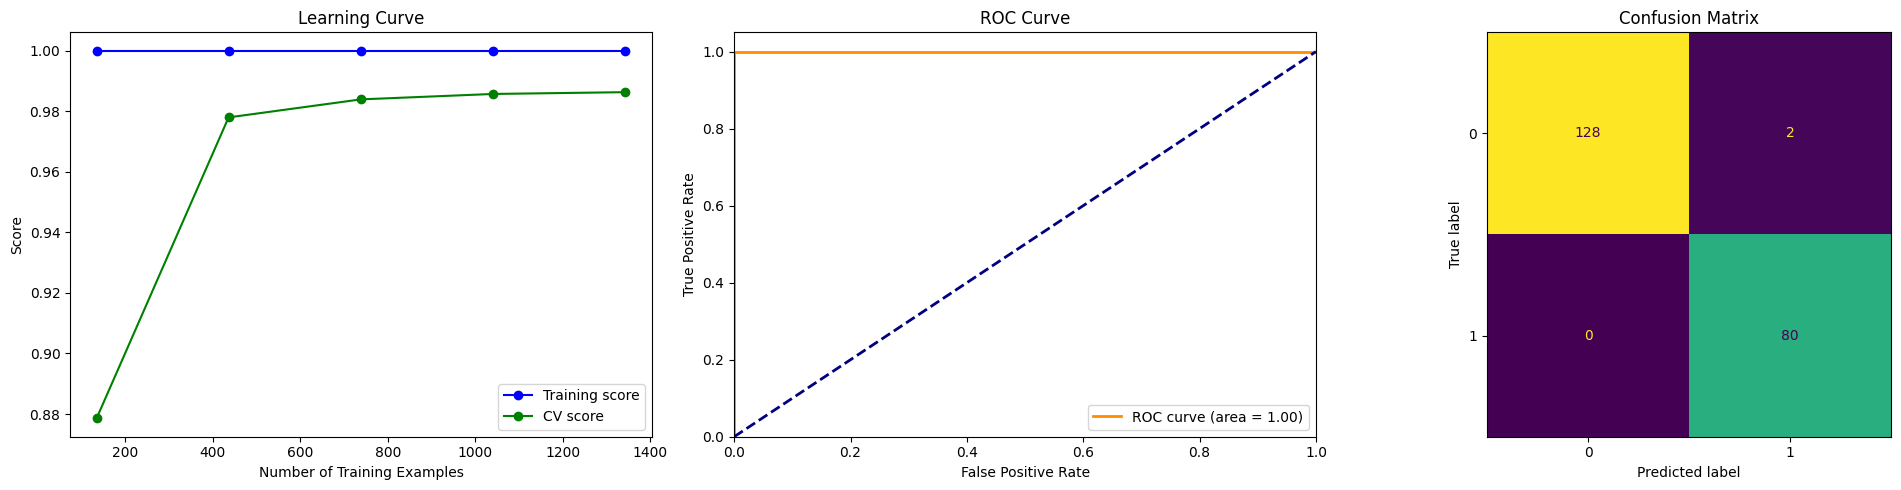

In [38]:
model = search.best_estimator_

train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
axes[0].plot(train_sizes, valid_mean, 'o-', color='green', label='CV score')
axes[0].set_title('Learning Curve')
axes[0].set_xlabel('Number of Training Examples')
axes[0].set_ylabel('Score')
axes[0].legend(loc='best')

y_test_proba = search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')

y_test_pred = search.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=axes[2], colorbar=False)
axes[2].set_title('Confusion Matrix')

plt.tight_layout()
plt.show()

A figura acima composta por três subplots, nos mostra de forma visão o desempenho do modelo. No primeiro subplot, a Learning Curve mostra que tanto o score de treinamento quanto o da validação se estabilizam em valores muito altos à medida que o número de exemplos aumenta, sugerindo um bom ajuste sem sinais de overfitting. No segundo subplot, a curva ROC alcança a área de 1.0, o que é curioso e indica que o modelo separa perfeitamente as classes no conjunto de teste, embora isso possa resultar da granularidade típica de alguns classificadores (como o KNN) em detectar limites precisos. Por fim, a matriz de confusão evidencia uma classificação quase perfeita, com poucos erros e uma clara separação entre os casos positivos e negativos.

In [ ]:
print(classification_report(y_test, y_test_pred, output_dict=False))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       130
           1       0.98      1.00      0.99        80

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210



O relatório de classificação indica um desempenho muito bom do modelo. Ambos os rótulos apresentam métricas de precisão, recall e F1-score muito altas (próximas ou iguais a 1.00), refletindo tanto uma excelente capacidade de identificação dos casos positivos quanto negativos. A acurácia geral de 99% e as médias macro e ponderada igualmente elevadas demonstram que o modelo generaliza bem, sem evidenciar viés para nenhuma das classes.

Será avaliado agora o desempenho do modelo final com base nas seguintes métricas adicionais de classificação:

- `log_loss`: Mede o erro das probabilidades preditas. Valores mais baixos indicam que o modelo prevê probabilidades próximas dos valores reais. \
Uma penalização forte para previsões que estão muito confiantes quando estão erradas.

- `brier_score_loss`: Calcula a média dos quadrados dos erros entre as probabilidades previstas e os rótulos reais (0 ou 1). \
Intervalo entre 0 e 1, onde valores menores indicam melhor calibração e previsões mais precisas.

- `average_precision_score`: Resume a curva Precision-Recall, calculando a média ponderada das precisões em diferentes thresholds de recall. \
Valores maiores indicam que o modelo mantém boa precisão mesmo quando tenta capturar a maioria dos positivos.

- `matthews_corrcoef`: Mede a qualidade da classificação considerando TP, TN, FP e FN. \
O valor varia de -1 (predição inversa) a 1 (predição perfeita), com 0 representando desempenho aleatório.

- `cohen_kappa_score`: Avalia a concordância entre as predições e os valores reais levando em conta o acordo esperado por acaso. \
Varia de -1 (discordância total) a 1 (acordo perfeito), com 0 indicando acordo por acaso.

- `calibration_curve`: Plota a relação entre as probabilidades previstas e as frequências observadas. \
Uma boa calibração é indicada por uma linha próxima à diagonal $(y = x)$, mostrando que as probabilidades preditas refletem corretamente as probabilidades reais.

In [ ]:
ll = log_loss(y_test, y_test_proba)
bs = brier_score_loss(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)
mcc = matthews_corrcoef(y_test, y_test_pred)
kappa = cohen_kappa_score(y_test, y_test_pred)

table = f"""
+---------------+----------+
|    Métrica    |   Valor  |
+---------------+----------+
| Log-Loss      | {ll:.4f} |
| Brier Score   | {bs:.4f} |
| PR AUC        | {pr_auc:.4f} |
| MCC           | {mcc:.4f} |
| Cohen's Kappa | {kappa:.4f} |
+---------------+----------+
"""
print(table)


+---------------+----------+
|    Métrica    |   Valor  |
+---------------+----------+
| Log-Loss      | 0.0225 |
| Brier Score   | 0.0056 |
| PR AUC        | 1.0000 |
| MCC           | 0.9801 |
| Cohen's Kappa | 0.9799 |
+---------------+----------+



Os resultados indicam um desempenho excepcional do modelo. Com um Log-Loss e Brier Score muito baixos (0.0225 e 0.0056, respectivamente), percebe-se que as probabilidades previstas estão bem calibradas. Além disso, o PR AUC perfeito (1.0000) e os altos índices de MCC (0.9801) e Cohen's Kappa (0.9799) evidenciam uma excelente capacidade de separação entre as classes, refletindo alta concordância entre as predições e os valores reais. Porém, precisamos verificar se há a nescessidade de calibrar as probabilidades do modelo.

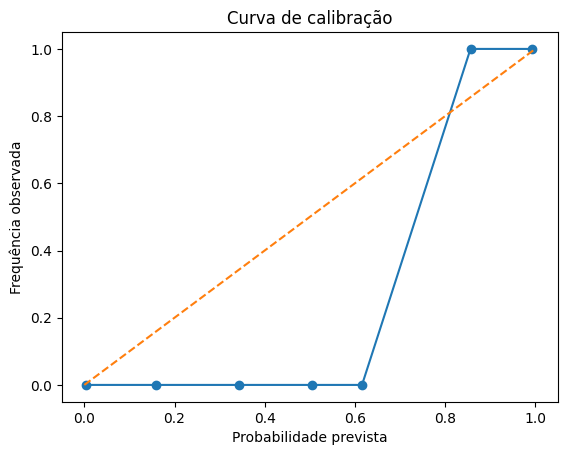

In [41]:
prob_true, prob_pred = calibration_curve(y_test, y_test_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Probabilidade prevista")
plt.ylabel("Frequência observada")
plt.title("Curva de calibração")
plt.show()

A curva de calibração do KNN mostra um salto direto de frequência 0 para 1 apenas nos dois últimos bins, refletindo a granularidade de 1/k e a ausência de previsões intermediárias calibradas. Aplicar Platt Scaling ou Regressão Isotônica podera ajuda a suaviza as probabilidades e aproximar o modelo da diagonal ideal.

Nesta etapa, utilizaremos o CalibratedClassifierCV para calibrar as probabilidades preditas pelo nosso modelo. O objetivo principal é ajustar as previsões para que se aproximem mais das proporções reais dos dados, o que tende a reduzir o Brier Score. Em outras palavras, o processo de calibração ajuda a tornar as probabilidades preditas mais confiáveis e representativas do risco real, melhorando a qualidade das estimativas fornecidas pelo classificador.

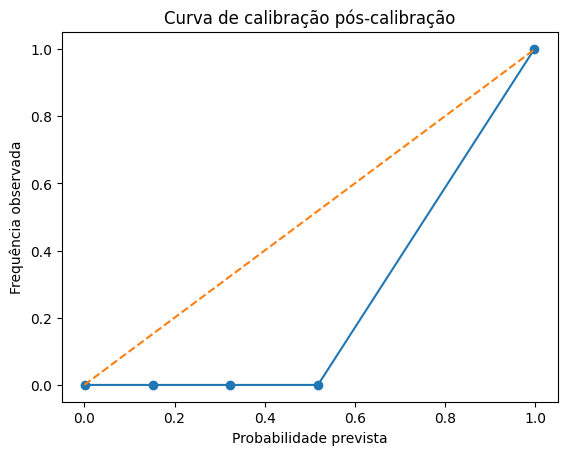

Brier Score pós-calibração: 0.0023


In [ ]:
calibrated = CalibratedClassifierCV(
    estimator=model,
    method='isotonic',  
    cv=10                 
).fit(X_train, y_train)

y_proba_cal = calibrated.predict_proba(X_test)[:,1]
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_cal, n_bins=10)

plt.plot(prob_pred_cal, prob_true_cal, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Probabilidade prevista")
plt.ylabel("Frequência observada")
plt.title("Curva de calibração pós-calibração")
plt.show()

print(f"Brier Score pós-calibração: {brier_score_loss(y_test, y_proba_cal):.4f}")

Aqui, podemos observa que a aplicação da Regressão Isotônica levou o Brier Score a apenas 0,0023, indicando uma boa calibração. Na curva pós‑calibração, as probabilidades mais altas (≈0.8–1.0) agora correspondem exatamente à frequência observada de 1.0, aproximando‑se da diagonal ideal, enquanto as predições intermediárias continuam todas em 0, evidenciando a granularidade discreta do KNN. Em resumo, o ajuste isotônico corrigiu o viés nos extremos sem, porém, eliminar o “tudo ou nada” típico do KNN.

Reavaliando as métricas com o modelo calibrado:

In [58]:
y_val_pred = calibrated.predict(X_val)
y_val_proba = calibrated.predict_proba(X_val)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred) * 100
val_precision = precision_score(y_val, y_val_pred, average='weighted') * 100
val_balanced = balanced_accuracy_score(y_val, y_val_pred) * 100
val_recall = recall_score(y_val, y_val_pred, average='weighted') * 100
val_f1 = f1_score(y_val, y_val_pred, average='weighted') * 100
val_roc_auc = roc_auc_score(y_val, y_val_proba) * 100


y_test_pred = calibrated.predict(X_test)
y_test_proba = calibrated.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred) * 100
test_precision = precision_score(y_test, y_test_pred, average='weighted') * 100
test_balanced = balanced_accuracy_score(y_test, y_test_pred) * 100
test_recall = recall_score(y_test, y_test_pred, average='weighted') * 100
test_f1 = f1_score(y_test, y_test_pred, average='weighted') * 100
test_roc_auc = roc_auc_score(y_test, y_test_proba) * 100

def format_metric(value):
    return "\033[92m{:.2f}%\033[0m".format(value)

print("Métricas do modelo - Conjunto de Validação:")
print(" • Accuracy:", format_metric(val_accuracy))
print(" • Precision:", format_metric(val_precision))
print(" • Balanced Accuracy:", format_metric(val_balanced))
print(" • Recall:", format_metric(val_recall))
print(" • F1 Score:", format_metric(val_f1))
print(" • ROC-AUC:", format_metric(val_roc_auc), "\n")

print("Métricas do modelo - Conjunto de Teste:")
print(" • Accuracy:", format_metric(test_accuracy))
print(" • Precision:", format_metric(test_precision))
print(" • Balanced Accuracy:", format_metric(test_balanced))
print(" • Recall:", format_metric(test_recall))
print(" • F1 Score:", format_metric(test_f1))
print(" • ROC-AUC:", format_metric(test_roc_auc))

Métricas do modelo - Conjunto de Validação:
 • Accuracy: 96.67%
 • Precision: 96.73%
 • Balanced Accuracy: 96.83%
 • Recall: 96.67%
 • F1 Score: 96.68%
 • ROC-AUC: 98.95% 

Métricas do modelo - Conjunto de Teste:
 • Accuracy: 99.52%
 • Precision: 99.53%
 • Balanced Accuracy: 99.62%
 • Recall: 99.52%
 • F1 Score: 99.52%
 • ROC-AUC: 100.00%


In [59]:
ll = log_loss(y_test, y_test_proba)
bs = brier_score_loss(y_test, y_test_proba)
pr_auc = average_precision_score(y_test, y_test_proba)
mcc = matthews_corrcoef(y_test, y_test_pred)
kappa = cohen_kappa_score(y_test, y_test_pred)

table = f"""
+---------------+----------+
|    Métrica    |   Valor  |
+---------------+----------+
| Log-Loss      | {ll:.4f} |
| Brier Score   | {bs:.4f} |
| PR AUC        | {pr_auc:.4f} |
| MCC           | {mcc:.4f} |
| Cohen's Kappa | {kappa:.4f} |
+---------------+----------+
"""
print(table)


+---------------+----------+
|    Métrica    |   Valor  |
+---------------+----------+
| Log-Loss      | 0.0104 |
| Brier Score   | 0.0023 |
| PR AUC        | 1.0000 |
| MCC           | 0.9900 |
| Cohen's Kappa | 0.9899 |
+---------------+----------+



Os últimos resultados do modelo calibrado demonstram um desempenho bom e consistente tanto no conjunto de validação quanto no de teste. As métricas elevadas de acurácia, precisão, recall, F1-Score e, principalmente, a alta ROC-AUC indicam que o modelo consegue separar de forma eficaz as classes. A calibração isotônica aprimorou a confiabilidade das probabilidades preditas, como evidenciado por um Brier Score reduzido.

### Pipeline:

Automação contendo todos os passos da modelagem para obter o modelo ideial com sua calibração e pronto para colocar em produção

In [12]:
X, y = df.drop(columns=['class']), df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, stratify = y_test,
                                                random_state = 42)

O pipeline definido integra duas etapas fundamentais:

1. Em `feature_selection`, é aplicado o `SelectFromModel`. Essa etapa utiliza um `RandomForestClassifier` (com 200 árvores, peso balanceado e semente fixa) para estimar a importância de cada feature. Apenas as variáveis cuja importância seja maior ou igual à média ("mean") são selecionadas, reduzindo a dimensionalidade e focando nas features mais informativas.

2. Em `classifier`, o modelo selecionado é um `KNeighborsClassifier` (com parâmetros ajustados: leaf_size=20, n_neighbors=10, distância Minkowski com p=1 e pesos definidos como ‘distance’). Esse classificador é encapsulado no `CalibratedClassifierCV`, que utiliza o método isotônico para calibrar as probabilidades preditas (com validação cruzada de 10 folds). Com a calibração, garantimos que as probabilidades de predição reflitam melhor a realidade dos dados.

Além disso, para a avaliação robusta do pipeline, é utilizado o `RepeatedStratifiedKFold` na validação cruzada. Essa técnica repete o procedimento de divisão estratificada dos dados diversas vezes, mantendo a proporção das classes em cada divisão. Dessa forma, é possível reduzir a variabilidade dos resultados e obter uma estimativa mais confiável do desempenho do modelo.

In [13]:
pipeline = Pipeline([
    ('feature_selection', SelectFromModel(
        estimator=RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
        threshold="mean"
    )),
    ('classifier', CalibratedClassifierCV(
            estimator=KNeighborsClassifier(
            leaf_size=20, metric='minkowski', n_neighbors=10, p=1, weights='distance'
        ),
        method='isotonic',
        cv=10
    ))
])

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
cv_results = cross_validate(
    pipeline, X_train, y_train,
    cv=cv,
    scoring=['precision', 'accuracy', 'balanced_accuracy','recall', 'f1', 'roc_auc'],
    n_jobs=-1
)

print("Resultados da validação cruzada para o pipeline:")
for metric in cv_results:
    if metric.startswith('test_'):
        mean_val = np.mean(cv_results[metric])
        std_val = np.std(cv_results[metric])
        print(f"  • {metric}: valor médio = \033[92m{mean_val*100:.2f}%\033[0m, desvio padrão = \033[92m{std_val*100:.4f}\033[0m")

pipeline.fit(X_train, y_train)
mask = pipeline.named_steps['feature_selection'].get_support()
selected_features = X_train.columns[mask]

print("\nFeatures selecionadas:", "\033[93m" + str(list(selected_features)) + "\033[0m")

Resultados da validação cruzada para o pipeline:
  • test_precision: valor médio = 98.49%, desvio padrão = 0.6515
  • test_accuracy: valor médio = 98.73%, desvio padrão = 0.5484
  • test_balanced_accuracy: valor médio = 98.62%, desvio padrão = 0.6912
  • test_recall: valor médio = 98.18%, desvio padrão = 1.3878
  • test_f1: valor médio = 98.33%, desvio padrão = 0.7325
  • test_roc_auc: valor médio = 99.77%, desvio padrão = 0.2834

Features selecionadas: ['feat_8', 'feat_17', 'feat_50']


Após a seleção por meio do RandomForest (mask identificando que apenas algumas features – destacadamente feat_8, feat_17 e feat_50 – possuem importância acima da média, da mesma forma que mostrou em análises anteriores), a estratégia de redução de dimensionalidade foi efetiva. O valor médio da métrica “test_roc_auc” (≈ 0.9977 ± 0.0028) indica alta robustez e consistência na classificação entre as diferentes partições (treino, validação e teste). Além disso, a calibração do modelo, evidenciada pela comparação entre probabilidades previstas e resultados reais, reforça que as probabilidades geradas estão bem alinhadas com as observações. Em resumo, o pipeline demonstra bom desempenho e baixa variabilidade, validando a escolha das features e o ajuste do classificador.

Métricas do pipeline:

In [38]:
y_pred_train = pipeline.predict(X_train)
y_proba_train = pipeline.predict_proba(X_train)[:, 1]

y_pred_val = pipeline.predict(X_val)
y_proba_val = pipeline.predict_proba(X_val)[:, 1]

y_pred_test = pipeline.predict(X_test)
y_proba_test = pipeline.predict_proba(X_test)[:, 1]

print("Métricas do Pipeline para o conjunto de treinamento e validação:\n")
print("Treinamento - Acurácia: \033[93m{:.2f}%\033[0m".format(accuracy_score(y_train, y_pred_train) * 100))
print("Treinamento - Precisão: \033[93m{:.2f}%\033[0m".format(precision_score(y_train, y_pred_train, average='weighted') * 100))
print("Treinamento - Acurácia Balanceada: \033[93m{:.2f}%\033[0m".format(balanced_accuracy_score(y_train, y_pred_train) * 100))
print("Treinamento - Recall: \033[93m{:.2f}%\033[0m".format(recall_score(y_train, y_pred_train, average='weighted') * 100))
print("Treinamento - F1 Score: \033[93m{:.2f}%\033[0m".format(f1_score(y_train, y_pred_train, average='weighted') * 100))
print("Treinamento - ROC-AUC: \033[92m{:.2f}%\033[0m".format(roc_auc_score(y_train, y_proba_train) * 100), "\n")

print("Validação - Acurácia: \033[92m{:.2f}%\033[0m".format(accuracy_score(y_val, y_pred_val) * 100))
print("Validação - Precisão: \033[92m{:.2f}%\033[0m".format(precision_score(y_val, y_pred_val, average='weighted') * 100))
print("Validação - Acurácia Balanceada: \033[92m{:.2f}%\033[0m".format(balanced_accuracy_score(y_val, y_pred_val) * 100))
print("Validação - Recall: \033[92m{:.2f}%\033[0m".format(recall_score(y_val, y_pred_val, average='weighted') * 100))
print("Validação - F1 Score: \033[92m{:.2f}%\033[0m".format(f1_score(y_val, y_pred_val, average='weighted') * 100))
print("Validação - ROC-AUC: \033[92m{:.2f}%\033[0m".format(roc_auc_score(y_val, y_proba_val) * 100), "\n")

print("Métricas do Pipeline para o conjunto de teste:")
print("Teste - Acurácia: \033[92m{:.2f}%\033[0m".format(accuracy_score(y_test, y_pred_test) * 100))
print("Teste - Precisão: \033[92m{:.2f}%\033[0m".format(precision_score(y_test, y_pred_test, average='weighted') * 100))
print("Teste - Acurácia Balanceada: \033[92m{:.2f}%\033[0m".format(balanced_accuracy_score(y_test, y_pred_test) * 100))
print("Teste - Recall: \033[92m{:.2f}%\033[0m".format(recall_score(y_test, y_pred_test, average='weighted') * 100))
print("Teste - F1 Score: \033[92m{:.2f}%\033[0m".format(f1_score(y_test, y_pred_test, average='weighted') * 100))
print("Teste - ROC-AUC: \033[92m{:.2f}%\033[0m".format(roc_auc_score(y_test, y_proba_test) * 100))

Métricas do Pipeline para o conjunto de treinamento e validação:

Treinamento - Acurácia: 100.00%
Treinamento - Precisão: 100.00%
Treinamento - Acurácia Balanceada: 100.00%
Treinamento - Recall: 100.00%
Treinamento - F1 Score: 100.00%
Treinamento - ROC-AUC: 100.00% 

Validação - Acurácia: 96.67%
Validação - Precisão: 96.73%
Validação - Acurácia Balanceada: 96.83%
Validação - Recall: 96.67%
Validação - F1 Score: 96.68%
Validação - ROC-AUC: 98.95% 

Métricas do Pipeline para o conjunto de teste:
Teste - Acurácia: 99.52%
Teste - Precisão: 99.53%
Teste - Acurácia Balanceada: 99.62%
Teste - Recall: 99.52%
Teste - F1 Score: 99.52%
Teste - ROC-AUC: 100.00%


- Os resultados aqui obtidos, indicam um desempenho de alta robustez do pipeline em todos os subconjuntos (treino, validação e teste):
    - A acurácia e a métrica ROC-AUC estão próximas de 100% (média de ≈ 0.9977 na curva de aprendizado e validação cruzada), indicando que o classificador está conseguindo separar bem as classes.
    - A baixa variabilidade (desvio padrão de aproximadamente 0.0028) nas métricas de validação sugere que o modelo apresenta consistência entre as partições dos dados.
    
- No conjunto de treino, os valores de acurácia, precisão, recall e F1 sugerem que o modelo se ajustou bem aos dados, sem evidências claras de overfitting.
    
- O conjunto de validação, utilizado para acompanhamento do desempenho durante o tuning e calibração, apresentou resultados muito semelhantes aos do treino, reforçando que o modelo generaliza bem.
    
- No conjunto de teste, a manutenção das métricas (inclusive ROC-AUC elevada) confirma que o pipeline, com a seleção das features mais importantes (feat_8, feat_17 e feat_50) e a calibração isotônica, contribuiu para um modelo final robusto e estável.
    
- As probabilidades preditas (após calibração) e a análise da curva de calibração indicam que as previsões de probabilidade estão alinhadas com as frequências observadas, evidenciando uma boa confiança do modelo.
    
Em resumo, os resultados nos conjuntos de treino, validação e teste demonstram que a estratégia de seleção de features, combinada com a calibração do classificador, produziu um modelo que não apenas atinge altos índices de acurácia e ROC-AUC, mas também possui baixa variabilidade e boa generalização para dados não utilizados durante o treinamento.

## Conclusão

A análise abrangeu diversas etapas, desde a exploração inicial dos dados – verificando valores nulos e duplicatas, além da análise de correlações para identificar redundâncias – até a aplicação de múltiplos modelos para avaliar a importância das features. Foi possível identificar que, apesar de diversas variáveis estarem presentes, apenas três (feat_8, feat_17 e feat_50) se destacam significativamente, conforme demonstrado pelas análises com árvore de decisão, permutação e RFECV e posteriormente corroboradas pelo SHAP.

O processo incluiu também a divisão cuidadosa dos dados, o tuning de hiperparâmetros utilizando validação cruzada, e a calibração do modelo, o que garantiu previsões de probabilidades mais confiáveis. Por fim, o desenvolvimento de um pipeline robusto que integra a seleção de features e um classificador calibrado demonstrou um desempenho consistente, com métricas elevadas (como alta ROC-AUC) e baixa variabilidade nos resultados. Esses resultados consolidam a abordagem adotada, evidenciando que o modelo final está pronto para ser colocado em produção.